In [37]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    s = np.maximum(0,x)
    return s

In [3]:
def initialize_parameters(layer_dims):
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*  np.sqrt(2 / layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [4]:
def forward_propagation(X, parameters):
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    z1 = np.dot(W1, X) + b1
    a1 = relu(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)
    
    cache = (z1, a1, W1, b1, z2, a2, W2, b2)
    
    return a2, cache

In [5]:
def backward_propagation(X, Y, cache):
    
    m = X.shape[1]
    (z1, a1, W1, b1, z2, a2, W2, b2) = cache
    
    dz2 = 1/m * (a2 - Y) # 예측값 - 실제값
    dW2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis = 1, keepdims = True)
    
    da1 = np.dot(W2.T, dz2)
    dz1 = np.multiply(da1, np.int64(a1 > 0))
    dW1 = np.dot(dz1, X.T)
    db1 = np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {"dz2": dz2, "dW2": dW2, "db2": db2,
                 "da1": da1, "dz1": dz1, "dW1": dW1, "db1": db1}
    
    return gradients

In [6]:
# GRADED FUNCTION: update_parameters_with_gd

def update_parameters_with_gd(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        parameters["W" + str(l+1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
        ### END CODE HERE ###
        
    return parameters

In [7]:
def compute_cost(a3, Y):
    
    logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
#     logprobs = np.sqrt(1/2 * (a3 - Y)**2)
    cost_total =  np.sum(logprobs)
    
    return cost_total

In [24]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    
    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)
    print(parameters)
    for i in range(num_epochs):
        
        cost_total = 0
        
        a3, caches = forward_propagation(X, parameters)
        
        cost_total += compute_cost(a3, Y)
        
        grads = backward_propagation(X, Y, caches)
        
        parameters = update_parameters_with_gd(parameters, grads, learning_rate)
        
        cost_avg = cost_total / m
        
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 1 == 0:
            costs.append(cost_avg)
            
    return parameters, costs

In [25]:
np.random.seed(1)
X = np.random.randn(3,2)
Y = np.array([1, 0])

print(X)

[[ 1.62434536 -0.61175641]
 [-0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387 ]]


In [26]:
layers_dims = [X.shape[0], 2, 1]
parameters, costs = model(X, Y, layers_dims, optimizer = "gd")

{'W1': array([[ 1.46040903,  0.3564088 ,  0.07878985],
       [-1.52153542, -0.22648652, -0.28965949]]), 'b1': array([[0.],
       [0.]]), 'W2': array([[-0.08274148, -0.62700068]]), 'b2': array([[0.]])}
Cost after epoch 0: 0.532389
Cost after epoch 1000: 0.294104
Cost after epoch 2000: 0.175846
Cost after epoch 3000: 0.113758
Cost after epoch 4000: 0.079260
Cost after epoch 5000: 0.058659
Cost after epoch 6000: 0.045488
Cost after epoch 7000: 0.036567
Cost after epoch 8000: 0.030232
Cost after epoch 9000: 0.025558


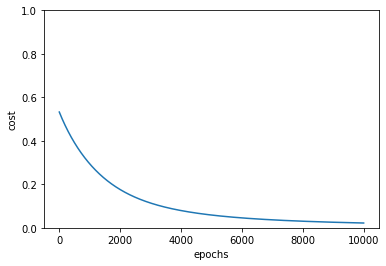

In [36]:
plt.plot(costs)
plt.ylim(0, 1)
plt.ylabel('cost')
plt.xlabel('epochs')
plt.show()

In [33]:
np.random.seed(2)
X_test = np.random.randn(3, 4)
X_test

array([[-0.41675785, -0.05626683, -2.1361961 ,  1.64027081],
       [-1.79343559, -0.84174737,  0.50288142, -1.24528809],
       [-1.05795222, -0.90900761,  0.55145404,  2.29220801]])

In [35]:
y_hat, caches = forward_propagation(X_test, parameters)
y_hat

array([[0.05257369, 0.18401848, 0.02728845, 0.97857882]])